In [1]:
#importing stuffs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  
import time
import serial.tools.list_ports
import openpyxl 
from openpyxl.drawing.image import Image

ModuleNotFoundError: No module named 'serial'

In [ ]:
#variables
ports = serial.tools.list_ports.comports()
serialInst = serial.Serial()

portList = []

#listing ports
for port in ports:
    portList.append(str(port))
    print(str(port))

#allowing user to select a port
inp = input("select Port: COM")

#selecting the port and making it usable
for x in range(0,len(portList)):
    if portList[x].startswith("COM" + str(inp)):
        portVar = "COM" + str(inp)
        print(portList[x])

#initailizing stuffs
serialInst = serial.Serial() #this is which comport the arduino is connected to.
serialInst.baudrate = 1000000 #setting things up to read data
serialInst.port = portVar
serialInst.open()
time.sleep(3)

In [31]:
#gathering data

#throwing trash data away 
for i in range(50):
    if serialInst.in_waiting:
        serialInst.readline()
        #print(i)

#intial empty list for gathering data
dataL = []

#declaring data points
PointLim = 500
DataPoints = 0

while DataPoints < PointLim:
    if serialInst.in_waiting:
        data = serialInst.readline()
        #print(data.decode('utf').rstrip('\n'))
        DecodedData = data.decode('utf').rstrip('\n')
        dataL.append(float(DecodedData.rstrip('\r')))
        DataPoints +=1
        #print(DataPoints)
        
#print(dataL)
#print(len(dataL))

In [32]:
#function block
def funct(t, A, B, f, phi):
    """
    Variable names!
    A = Amplitude
    B = Vertical Displacement 
    t = time
    f = frequency
    phi = phase shift
    """
    return(float(A)*np.sin(2.0*np.pi*f*t + phi) + B)

887.0 254.0
316.5 570.5


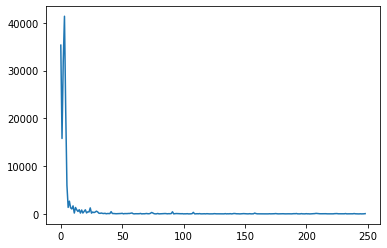

316.5 570.5
[180.67750613 471.86512799   8.4145067    0.6401774 ]
[845.0, 854.0, 866.0, 874.0, 877.0, 880.0, 882.0, 884.0, 877.0, 872.0, 868.0, 861.0, 853.0, 845.0, 835.0, 821.0, 809.0, 799.0, 785.0, 772.0, 760.0, 748.0, 734.0, 725.0, 727.0, 711.0, 699.0, 678.0, 666.0, 655.0, 643.0, 628.0, 607.0, 592.0, 575.0, 561.0, 549.0, 530.0, 516.0, 501.0, 489.0, 476.0, 466.0, 455.0, 443.0, 433.0, 425.0, 416.0, 407.0, 397.0, 387.0, 377.0, 370.0, 354.0, 336.0, 326.0, 319.0, 317.0, 308.0, 300.0, 291.0, 291.0, 294.0, 287.0, 287.0, 282.0, 280.0, 279.0, 274.0, 272.0, 268.0, 266.0, 264.0, 262.0, 261.0, 260.0, 260.0, 256.0, 256.0, 257.0, 256.0, 256.0, 255.0, 264.0, 276.0, 272.0, 273.0, 268.0, 268.0, 271.0, 272.0, 274.0, 263.0, 272.0, 272.0, 274.0, 275.0, 276.0, 275.0, 280.0, 281.0, 284.0, 285.0, 285.0, 290.0, 290.0, 293.0, 296.0, 296.0, 298.0, 299.0, 300.0, 305.0, 297.0, 292.0, 297.0, 301.0, 310.0, 310.0, 308.0, 308.0, 315.0, 320.0, 321.0, 323.0, 325.0, 327.0, 326.0, 329.0, 331.0, 332.0, 332.0, 336.0, 33

In [33]:
#curve fitting

#Determine values for A and B such that the curve fitting function will have a good first guess. (basic trig powers unite!)
print(np.max(dataL), np.min(dataL))
B = float((np.max(dataL) + np.min(dataL))/2.0)
A = float(np.max(dataL) - B)
print(A, B)
F = np.fft.fft(dataL)
fq = np.fft.fftfreq(F.shape[0], 0.001)
F = F[fq > 4]
fq = fq[fq > 4]
fi = np.argmax(np.abs(F))
f = fq[fi]
phi = np.angle(F[fi])

plt.plot(np.abs(F))
plt.show()
print(A, B)

p0 = [A, B, f, phi]

t = np.arange(0, 0.5, 0.001)
#write curve fitting function
#the t value is the one determined two code chunks above (t = 500)
fitvals, fitcov = curve_fit(funct, t, dataL, p0 = p0, maxfev=10000)
print(fitvals)

print(dataL)

#visiblity
print(A, B)
V = A/B
print(V)

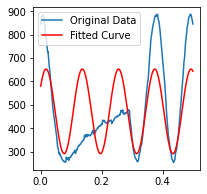

In [34]:
#mixed plot
plt.plot(t, dataL, label = 'Original Data')
plt.plot(t, funct(t, *fitvals), "r-", label = 'Fitted Curve')
plt.legend(loc='best')
figure = plt.gcf()
figure.set_size_inches(3, 3)
plt.savefig("fitted_curve.png")
plt.show()

In [35]:
#Exporting to excel
img = Image("fitted_curve.png")

wb = openpyxl.load_workbook("laser_data.xlsx")
wb.active = 0
ws = wb.active
ws.add_image(img, "C2")
wb.save("laser_data.xlsx")

#visiblity
print(A, B)
V = A/B
print(V)

PermissionError: [Errno 13] Permission denied: 'laser_data.xlsx'